a
simulation_duration : 6
intersections_number : 4
streets_number : 5
cars_number : 2
bonnus_point : 1000
6


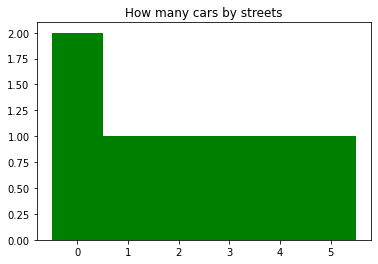

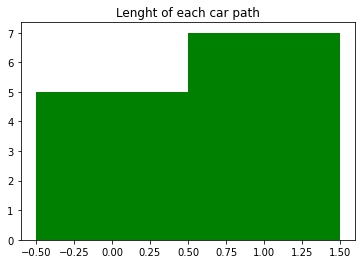

b
simulation_duration : 5070
intersections_number : 7073
streets_number : 9102
cars_number : 1000
bonnus_point : 1000
8468


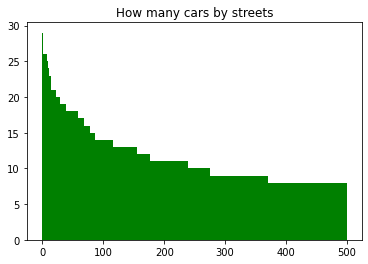

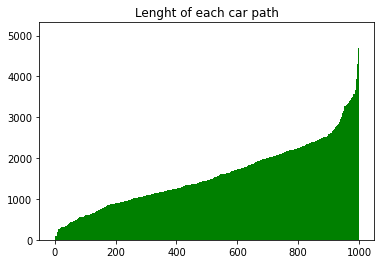

c
simulation_duration : 1640
intersections_number : 10000
streets_number : 35030
cars_number : 1000
bonnus_point : 100
12424


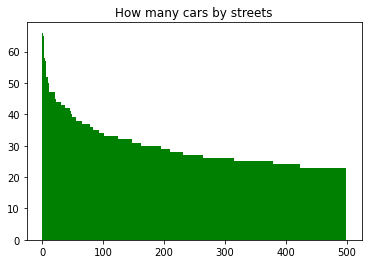

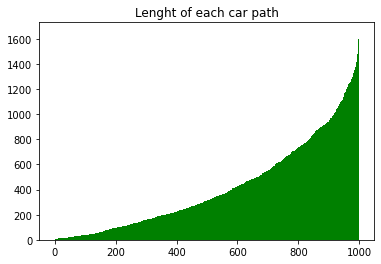

d
simulation_duration : 8071
intersections_number : 8000
streets_number : 95928
cars_number : 1000
bonnus_point : 1000
84868


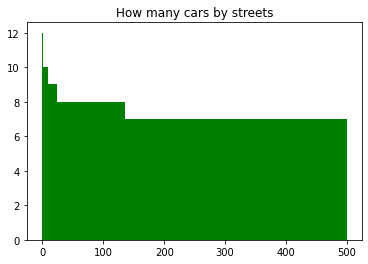

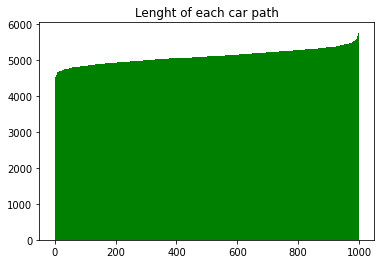

e
simulation_duration : 676
intersections_number : 500
streets_number : 998
cars_number : 1000
bonnus_point : 500
1480


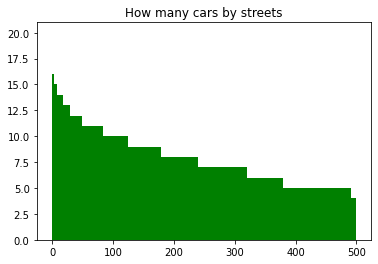

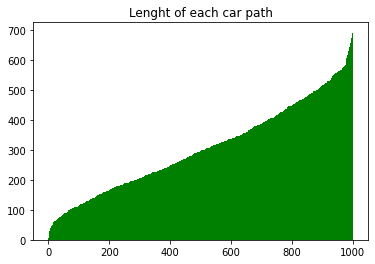

In [64]:
list_file = ["a","b","c","d","e"]
for fichier in list_file:
    print(fichier)
    fichier = open("data/"+fichier+".txt")
    all_lines = fichier.readlines()
    tab = all_lines[0].split(" ")
    simulation_duration = int(tab[0])
    intersections_number = int(tab[1])
    streets_number = int(tab[2])
    cars_number = int(tab[3])
    bonnus_point = int(tab[4])

    dico_streets = dict()
    for k in range(streets_number):
        start_inter,end_inter,street_name,lenght = all_lines[k+1].split(" ")
        dico_streets[street_name]=(start_inter,end_inter,lenght)

    list_of_path = []
    for k in range(cars_number):
        tab = all_lines[k+1+streets_number].split(" ")
        nb_streets=tab[0]
        list_of_streets = tab[1:]
        list_of_path.append((nb_streets,list_of_streets))
    print("simulation_duration :",simulation_duration)
    print("intersections_number :",intersections_number)
    print("streets_number :",streets_number)
    print("cars_number :",cars_number)
    print("bonnus_point :",bonnus_point)
    used_street(list_of_path,dico_streets)
    path_stats(list_of_path,dico_streets)
    

In [2]:
print(all_lines)

['6 4 5 2 1000\n', '2 0 rue-de-londres 1\n', '0 1 rue-d-amsterdam 1\n', '3 1 rue-d-athenes 1\n', '2 3 rue-de-rome 2\n', '1 2 rue-de-moscou 3\n', '4 rue-de-londres rue-d-amsterdam rue-de-moscou rue-de-rome\n', '3 rue-d-athenes rue-de-moscou rue-de-londres\n']


In [48]:
import matplotlib.pyplot as plt
def used_street(list_of_path,dico_streets):
    dico_street_use = dict()
    for path in list_of_path :
        for street in path[1]:
            if(street in dico_street_use.keys()):
                dico_street_use[street]+=1
            else:
                dico_street_use[street]=1
    dico_street_use = {k: v for k, v in sorted(dico_street_use.items(), key=lambda item: item[1],reverse=True)}
    print(len(dico_street_use))
    limit = 500
    list_x = [k for k in range(len(dico_street_use))][:limit]
    list_y = list(dico_street_use.values())[:limit]
    plt.bar(list_x, list_y, 1, color='g')
    plt.title("How many cars by streets")
    plt.show()

In [63]:
def path_stats(list_of_path,dico_streets):
    list_total_lenght = []
    for path in list_of_path :
        nb,list_of_street = path
        lenght = 0
        for st in list_of_street:
            lenght+=int(dico_streets[st.replace("\n","")][2])
        list_total_lenght.append(lenght)
    list_total_lenght = sorted(list_total_lenght)
    list_x = [k for k in range(len(list_total_lenght))]
    plt.bar(list_x, list_total_lenght, 1, color='g')
    plt.title("Lenght of each car path")
    plt.show()
        